In [0]:
!nvidia-smi

Sun Jun 14 01:33:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
!pwd

/content


In [0]:
!ls

drive  sample_data


In [0]:
cd drive/

In [0]:
#Install detectron2

!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-lp8iluji
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-lp8iluji
     |████████████████████████████████| 276kB 6.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1-cp36-none-any.whl size=44898 sha256=a1800e6ec12c1bda6b38f974c2b2c43108068b84fc91d7b208ee2b1963f8aa62
  Stored in directory: /tmp/pip-ephem-wheel-cache-ie26xefe/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=1df393934545a6a950be33ace35503ee32d54a1bf14241217b8d0df5e0125e8b
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully

'1.5.0+cu101'

In [0]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 1.9MB/s 


In [0]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [0]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
  inflating: data/images/1.jpg       
  inflating: data/images/14-german-shepherd-CruftsChannel4.jpg  
  inflating: data/images/30_07_2018-helmateddn_18257838_9831516.jpg  
  inflating: data/images/300px-I-80_Eastshore_Fwy.jpg  
  inflating: data/images/1280px-German_Shepherd_Dog_with_disc.jpg  
  inflating: data/images/3451e49fa7e5f3584138c4cbb983112e.jpg  
  inflating: data/images/3600.jpg    
  inflating: data/images/3600 (1).jpg  
  inflating: data/images/106036.jpg  
  inflating: data/images/177961-may23-helmet.jpg  
  inflating: data/images/1171297-slow-motion-timelapse-city-cars-traffic-wide-road-vehicles-day-stock-video-footage-videoblocks-wide-road-png-1920_1080_preview.png  
  inflating: data/images/01272020-Kawasaki-Ninja-650-4411-633x388.jpg  
  inflating: data/images/animals_hero_koala02 copy.jpg  
  inflating: data/images/assortment-of-colorful-ripe-tropical-fruits-top-royalty-free-image-995518546-1564092355.

In [0]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("sample", {}, "./data/trainval.json", "./data/images")

AssertionError: ignored

In [0]:
sample_metadata = MetadataCatalog.get("sample")
dataset_dicts = DatasetCatalog.get("sample")

WARNING [06/14 02:18:58 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/14 02:18:58 d2.data.datasets.coco]: Loaded 51 images in COCO format from ./data/trainval.json


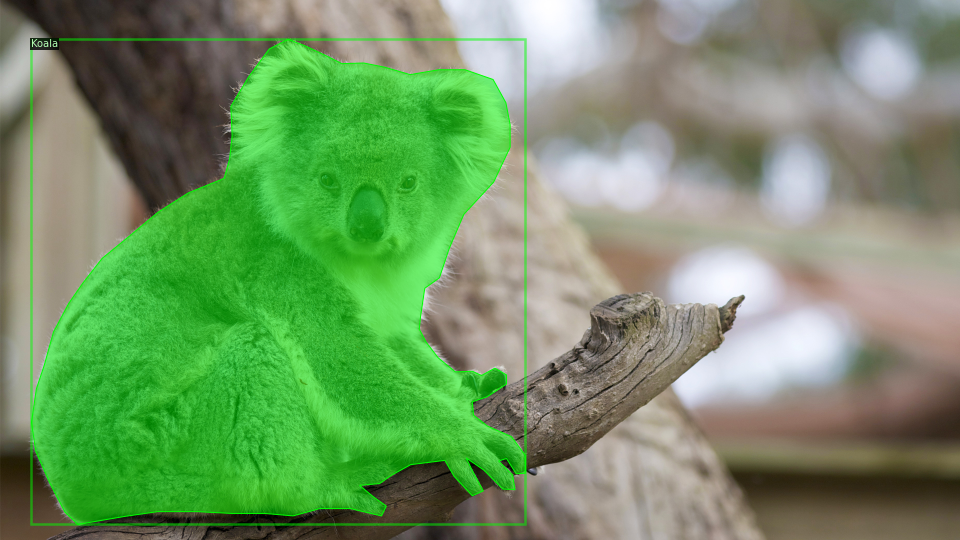

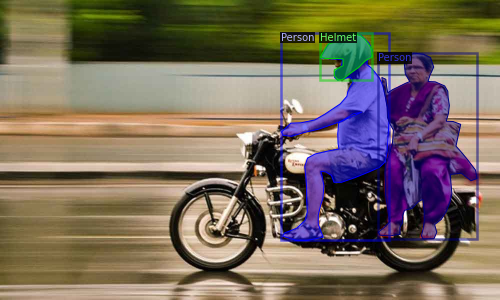

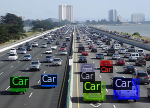

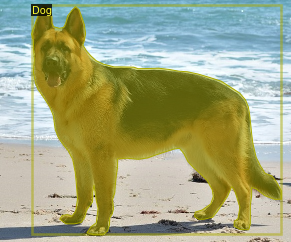

In [0]:
import random

for d in random.sample(dataset_dicts, 4):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [0]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5422 (delta 1), reused 4 (delta 1), pack-reused 5415
Receiving objects: 100% (5422/5422), 2.53 MiB | 24.45 MiB/s, done.
Resolving deltas: 100% (3899/3899), done.


In [0]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("sample",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 1000    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 14  # 3 classes (Person, Helmet, Car)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[06/14 02:22:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:03, 58.8MB/s]                           
Unable to load 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (15, 1024) in the model!
Unable to load 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (15,) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (56, 1024) in the model!
Unable to load 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (56,) in the model!
Unable to load 'roi_heads.mask_head.predictor.weight' to the model due to incompatible shapes: (80, 256, 1, 1) in the checkpoint but (14, 256, 1, 1) in the model!
Unable to load 'roi_heads.mask_head.predictor.bias' to the model due to incompatible shapes: (80,) in the checkpoint but (14,) in the model!


[06/14 02:22:58 d2.engine.train_loop]: Starting training from iteration 0
[06/14 02:23:05 d2.utils.events]:  eta: 0:04:59  iter: 19  total_loss: 3.492  loss_cls: 2.215  loss_box_reg: 0.620  loss_mask: 0.689  loss_rpn_cls: 0.037  loss_rpn_loc: 0.010  time: 0.3115  data_time: 0.0349  lr: 0.000400  max_mem: 2705M
[06/14 02:23:11 d2.utils.events]:  eta: 0:04:59  iter: 39  total_loss: 1.919  loss_cls: 0.730  loss_box_reg: 0.545  loss_mask: 0.586  loss_rpn_cls: 0.010  loss_rpn_loc: 0.010  time: 0.3140  data_time: 0.0090  lr: 0.000799  max_mem: 2759M
[06/14 02:23:17 d2.utils.events]:  eta: 0:04:50  iter: 59  total_loss: 1.710  loss_cls: 0.643  loss_box_reg: 0.663  loss_mask: 0.405  loss_rpn_cls: 0.011  loss_rpn_loc: 0.009  time: 0.3127  data_time: 0.0206  lr: 0.001199  max_mem: 2759M
[06/14 02:23:23 d2.utils.events]:  eta: 0:04:43  iter: 79  total_loss: 1.408  loss_cls: 0.484  loss_box_reg: 0.634  loss_mask: 0.291  loss_rpn_cls: 0.006  loss_rpn_loc: 0.012  time: 0.3107  data_time: 0.0067  lr:

In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("sample", )
predictor = DefaultPredictor(cfg)

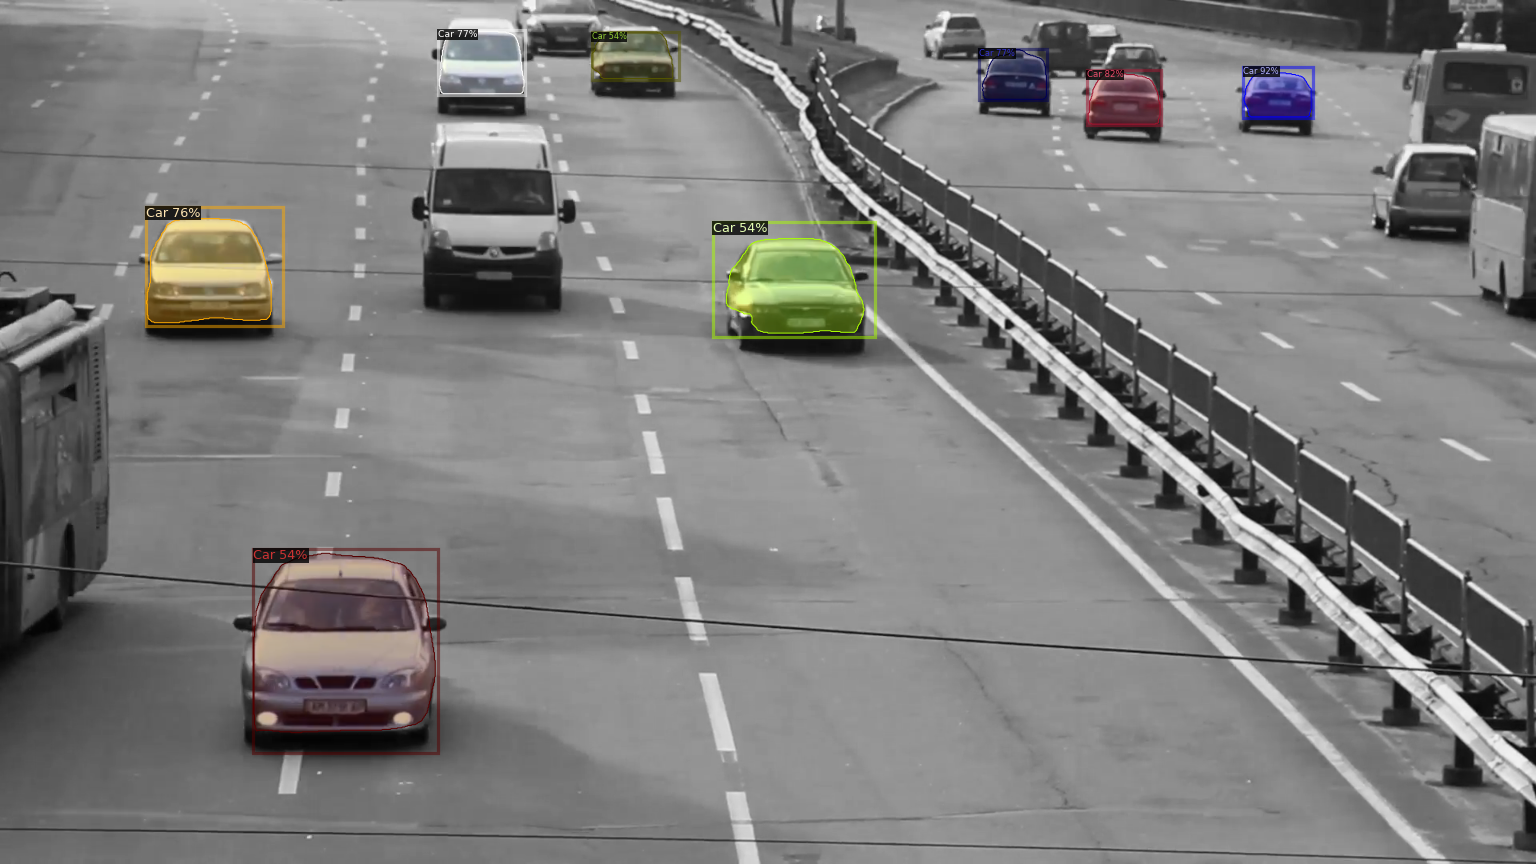

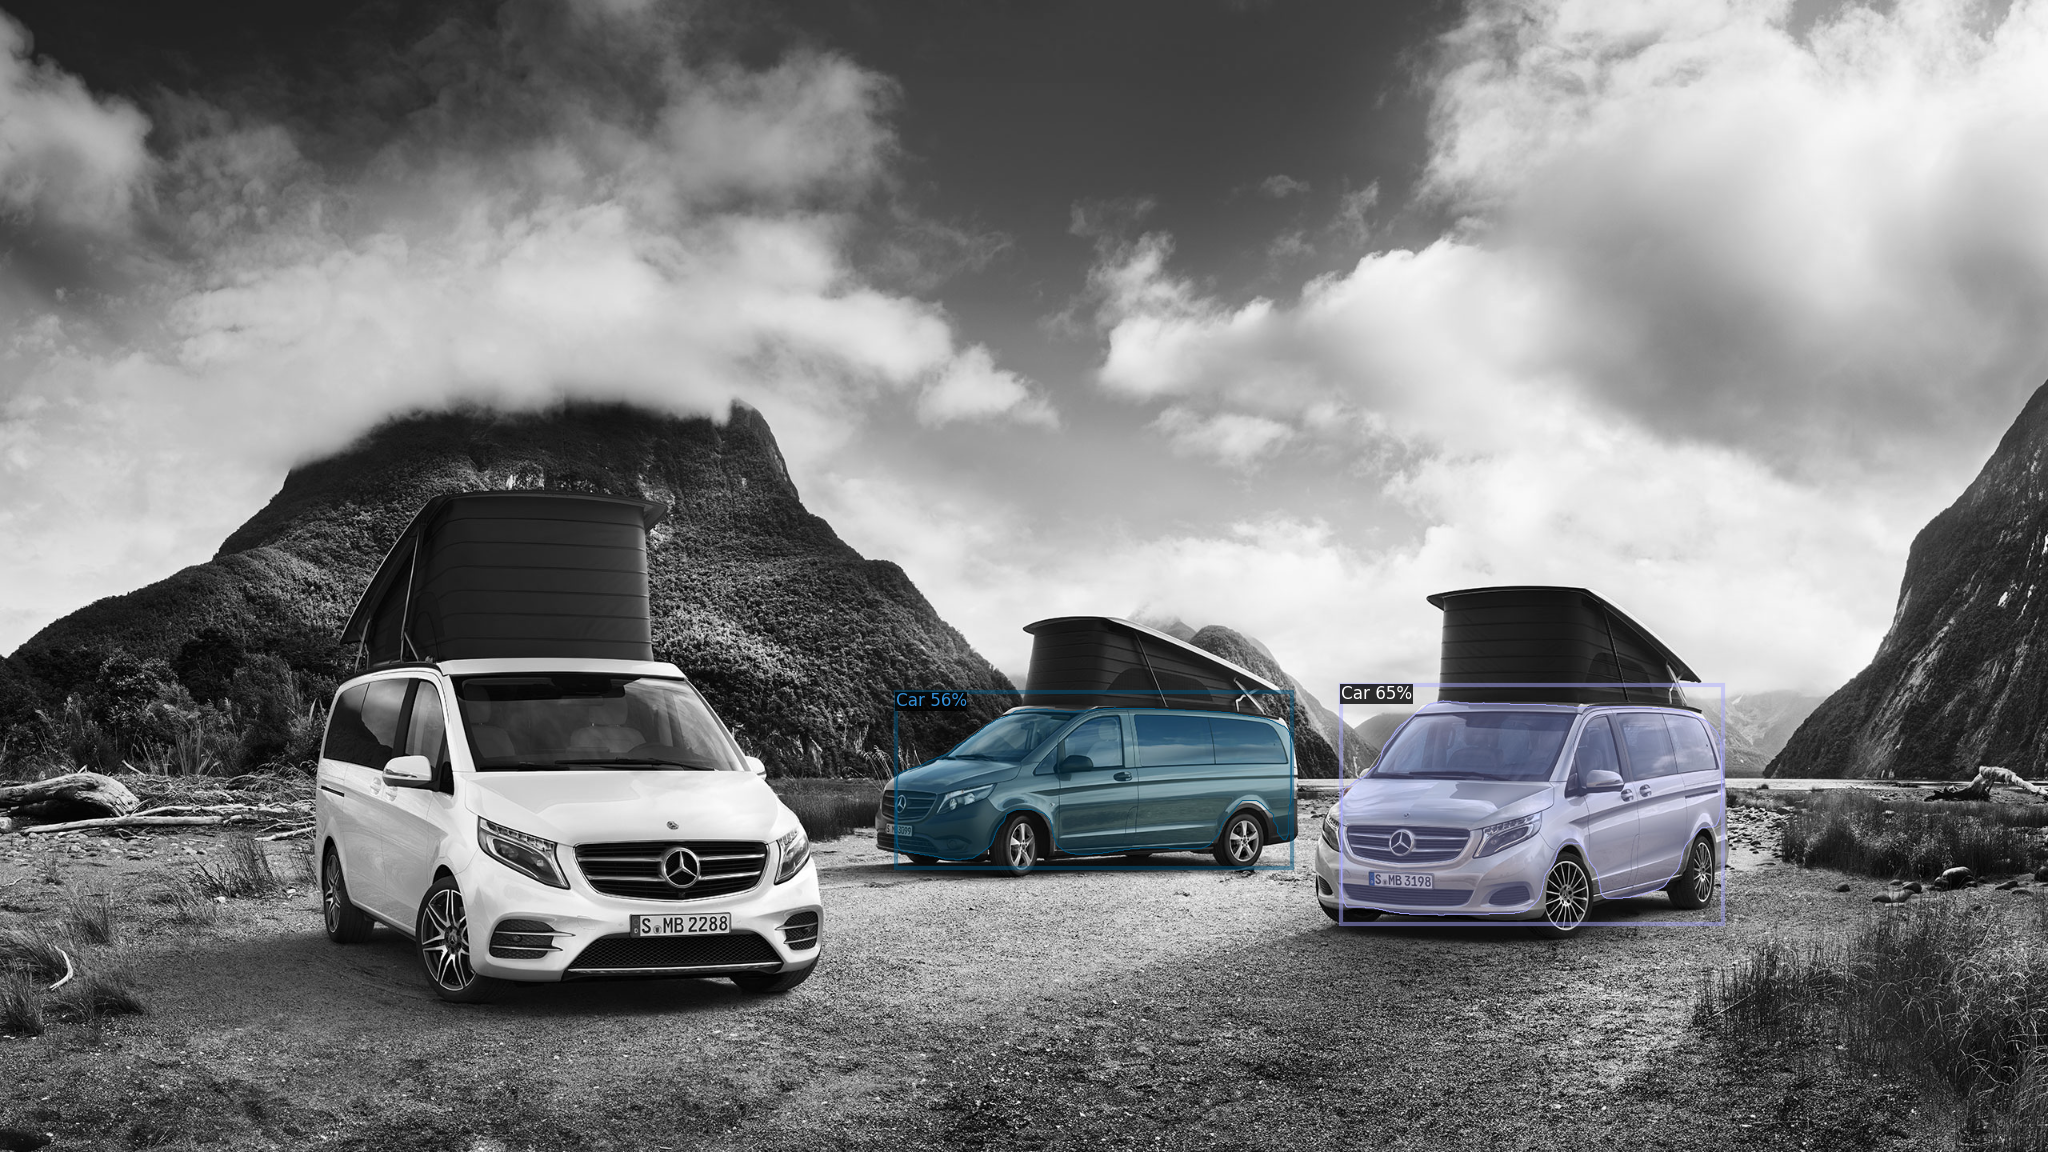

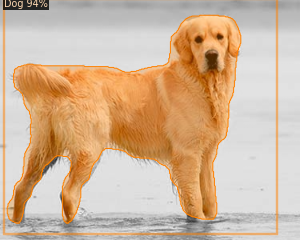

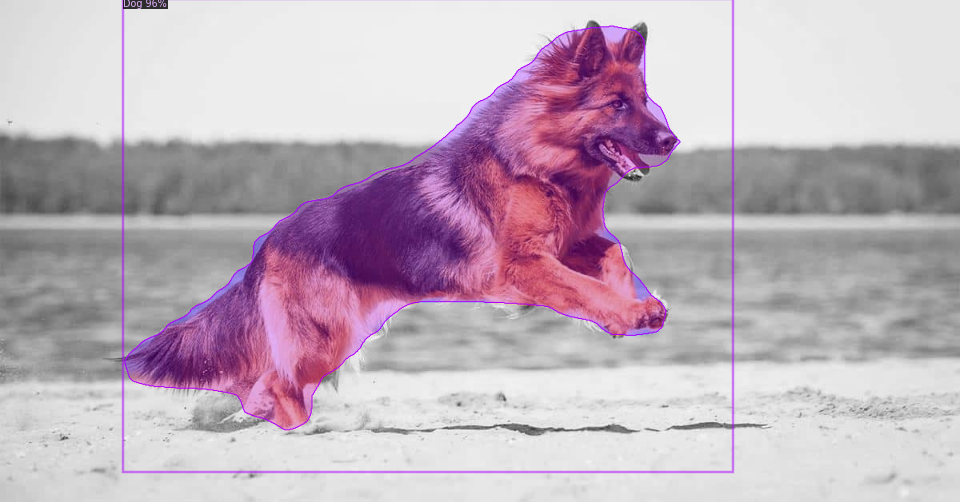

In [0]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])